<a target="_blank" href="https://colab.research.google.com/github/cerr/pyCERR-Notebooks/blob/main/batch_visualize_scan_seg_ex1.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Visualize scan and segmentation for a batch of dicom datasets

This notebook provides a tool to readliy check quality of underlying data before running analysis. The example below demonstrates visualizing CT scan and tumor segmentation for a batch of DICOM datasets. Central axial slice for tumor segmentation is shown in this example. Users have access to the entire metadata via CERR's plan container object (planC), so the notebook can be customized to display different slices or image layers.

### Install pyCERR

In [1]:
%%capture
!pip install git+https://github.com/cerr/pyCERR/

### Install Virtual File Buffer

In [2]:
!export NAPARI_APPLICATION_IPY_INTERACTIVE=0
!apt-get install x11-utils > /dev/null 2>&1
!pip install pyglet > /dev/null 2>&1
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1


### Start virtual display

In [3]:
from pyvirtualdisplay import Display
from IPython.display import Image, display
virtualDisplay = Display(visible=0, size=(600, 600))
virtualDisplay.start()

## Visualize scan and segmentation

Data dir :/usr/local/lib/python3.10/dist-packages/cerr/datasets/radiomics_phantom_dicom/PAT1
('PAT1', 'PAT1', '1.3.6.1.4.1.9590.100.1.2.96328687310426543129572151154132284399', '1.3.6.1.4.1.9590.100.1.2.258301620411152643708006163321128526885', 'RTSTRUCT', '', '', '', '', '', '')
('PAT1', 'PAT1', '1.3.6.1.4.1.9590.100.1.2.96328687310426543129572151154132284399', '1.3.6.1.4.1.9590.100.1.2.296658988911737913102339329841519593982', 'CT', '', '', '', '', '', '')


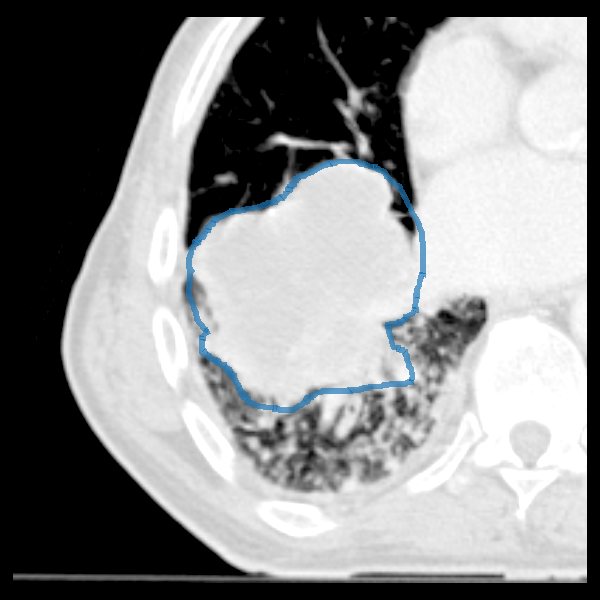

Data dir :/usr/local/lib/python3.10/dist-packages/cerr/datasets/radiomics_phantom_dicom/PAT2
('PAT2', 'PAT2', '1.3.6.1.4.1.9590.100.1.2.186722590312853886701735768582616095132', '1.3.6.1.4.1.9590.100.1.2.16016500911558447542485925491404262309', 'CT', '', '', '', '', '', '')
('PAT2', 'PAT2', '1.3.6.1.4.1.9590.100.1.2.186722590312853886701735768582616095132', '1.3.6.1.4.1.9590.100.1.2.83077934412344456434331598470407844553', 'RTSTRUCT', '', '', '', '', '', '')


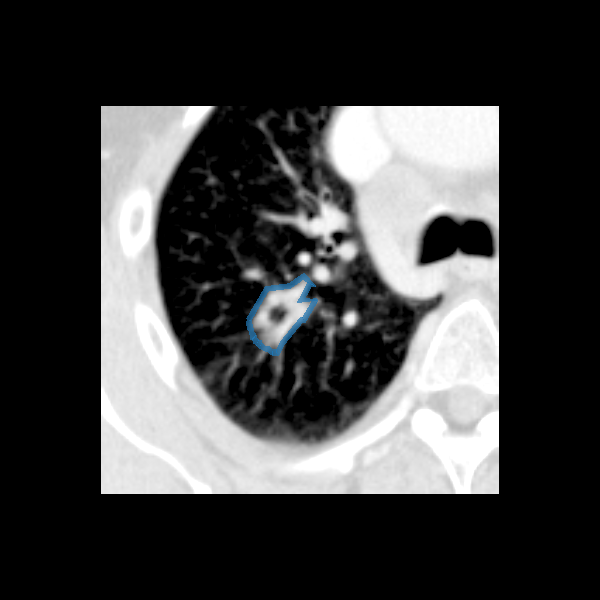

Data dir :/usr/local/lib/python3.10/dist-packages/cerr/datasets/radiomics_phantom_dicom/PAT3
('PAT3', 'PAT3', '1.3.6.1.4.1.9590.100.1.2.409070330913773454628579649303466119021', '1.3.6.1.4.1.9590.100.1.2.351624503710776750911285093361744472924', 'CT', '', '', '', '', '', '')
('PAT3', 'PAT3', '1.3.6.1.4.1.9590.100.1.2.409070330913773454628579649303466119021', '1.3.6.1.4.1.9590.100.1.2.357624831212820688235812622582660063404', 'RTSTRUCT', '', '', '', '', '', '')


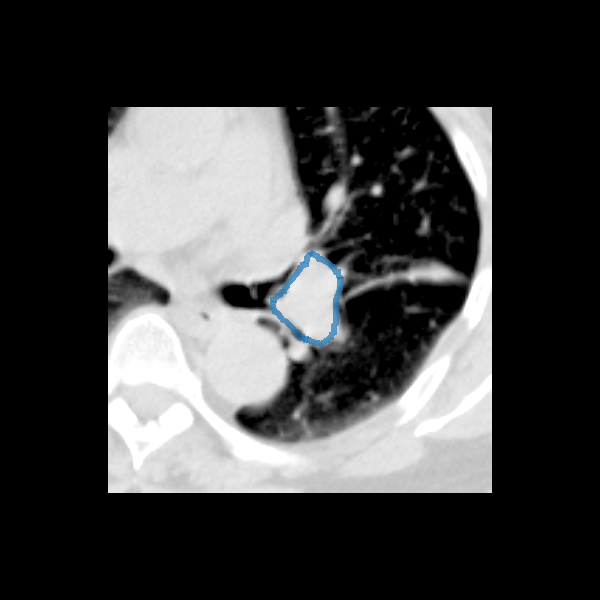

Data dir :/usr/local/lib/python3.10/dist-packages/cerr/datasets/radiomics_phantom_dicom/PAT4
('PAT4', 'PAT4', '1.3.6.1.4.1.9590.100.1.2.136596769910803090206945148270543894255', '1.3.6.1.4.1.9590.100.1.2.106284251511039171728979245242481617976', 'RTSTRUCT', '', '', '', '', '', '')
('PAT4', 'PAT4', '1.3.6.1.4.1.9590.100.1.2.136596769910803090206945148270543894255', '1.3.6.1.4.1.9590.100.1.2.302171868711114827615998050902174932584', 'CT', '', '', '', '', '', '')


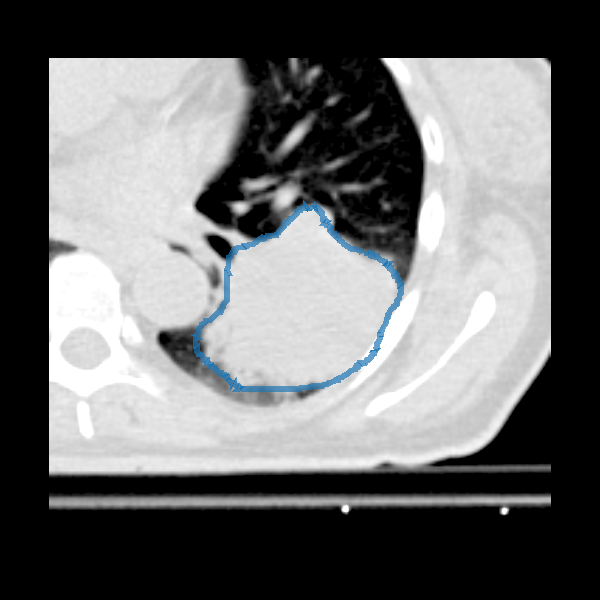

In [4]:
from cerr import datasets
import os
phantom_dir = os.path.join(os.path.dirname(datasets.__file__),'radiomics_phantom_dicom')
pat_names = ['PAT1', 'PAT2', 'PAT3', 'PAT4']
all_pat_dirs = [os.path.join(phantom_dir, pat) for pat in pat_names]
from cerr import plan_container as pc
from cerr import viewer as vwr
from skimage.io import imsave, imshow
for pt_dir in all_pat_dirs:
    print("Data dir :" + pt_dir)
    planC = pc.load_dcm_dir(pt_dir)
    scanNum = [0]
    doseNum = []
    strNum = 0
    displayMode = '2d'
    viewer, scan_layer, dose_layer, struct_layer = \
    vwr.show_scan_struct_dose(scanNum, strNum, doseNum, planC, displayMode)
    scan_layer[0].opacity = 1
    scan_layer[0].contrast_limits_range = [-800, 200]
    scan_layer[0].contrast_limits = [-800, 200]
    scan_layer[0].gamma = 0.7
    viewer.camera.zoom = 20
    #viewer.camera.center = (0, 100, 100)
    screenshot = viewer.screenshot(size =(600, 600))
    viewer.close()
    fname = 'img.png'
    imsave(fname, screenshot)
    display(Image(filename=fname, retina=False, width=200, embed=True))
